In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import nltk  
from wordcloud import WordCloud

from konlpy.tag import Okt

from collections import Counter

import datetime

###여기서부터 bigram

import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams

In [42]:
train = pd.read_excel('C:\\Users\\dtaok\\LSJ\\데이터 정보화\\할로윈온라인품목_1021(반출)2.xlsx')

print(train.shape)
train.head()

(14420, 11)


,가맹점명,거래상품명,거래승인금액,레벨1,레벨2,레벨3,레벨4,레벨5,구분1,구분2,연령대
0,이후맘,히어로코스튬외1건,40000,기타용역서비스,유아동의류/잡화,의류/잡화,테마의류/용품,유아동 파티복,의상,성인의상,30대
1,NaN,히어로 할로윈 의상 망토 세트 가면 망토 스파이더맨 free,4910,출산/유아동,유아동의류/잡화,의류/잡화,테마의류/용품,유아동 파티복,소품,코스튬소품,40대
2,NaN,히어로 할로윈 의상 망토 세트 가면 망토 스파이더맨 free,9300,출산/유아동,유아동의류/잡화,의류/잡화,테마의류/용품,유아동 파티복,소품,코스튬소품,40대
3,쿠팡,히어로 할로윈 의상 망토 세트 가면 망토,15800,패션의류,비브랜드 의류,테마의류/잡화,테마의류/용품,유아동 파티복,소품,코스튬소품,30대
4,롯데쇼핑 주,히어로 코스튬 세트 cems219m1 nc광주,24783,출산/유아동,유아동의류/잡화,의류/잡화,테마의류/용품,유아동 파티복,의상,성인의상,30대


In [43]:
non_list = ['코스프레', '할로윈','코스튬','의상','아동','유아','어린이','세트','키즈','파티','아기',
            '남아','선물','주니어','생일','하복','데이','오버','실내','메이드','스타킹','세라','바니',
            '섹시','이벤트','성인','대여','졸업사진','체육대회','란제리','속옷','여성','칼날',
            '소품','용품','게임','랜드','답례','간식','쿠키','귀멸','크리스마스',
            '소품','헤어','게임','졸업사진','포함','팬티','당일','가을','발송','증정','무료','추천','복장','모음','여자',
            '고급','혜택','혼합','여름','역대','정품','행사','선착순','해외','이벤','쿠폰','컨셉','커버','배송','상품','남자',
            '인기','사은','신상','지아지조','하녀'
           ]

for i in non_list:
    train['거래상품명'] = train['거래상품명'].str.replace(i, ' ')

In [44]:
train_costume_child = train[train['구분2'] == '아동의상']
train_costume_adult = train[train['구분2'] == '성인의상']
train_items_event = train[train['구분2'] == '이벤트소품']
train_items_cos = train[train['구분2'] == '코스튬소품']

train_costume_child = train_costume_child.reset_index()
train_costume_adult = train_costume_adult.reset_index()
train_items_event = train_items_event.reset_index()
train_items_cos = train_items_cos.reset_index()

In [45]:
twit = Okt()

train_costume_child['Noun'] = train_costume_child['거래상품명'].apply(twit.nouns) # only 명사
train_costume_adult['Noun'] = train_costume_adult['거래상품명'].apply(twit.nouns) # only 명사
train_items_event['Noun'] = train_items_event['거래상품명'].apply(twit.nouns) # only 명사
train_items_cos['Noun'] = train_items_cos['거래상품명'].apply(twit.nouns) # only 명사

# 아동의상

In [30]:
noun_text = [j for i in train_costume_child['Noun'] for j in i]
text = nltk.Text(noun_text, name='NMSC')
count = Counter(text.vocab())
han_tags = Counter.most_common(count)

# 단어 길이가 1인 단어는 제외
wordInfo = dict()
for tags, counts in han_tags:
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts

han_tags = Counter.most_common(wordInfo)

1016
원피스 : 651
드레스 : 516
슈트 : 409
공주 : 348
마녀 : 324
포켓몬 : 307
피카츄 : 225
마리오 : 203
스파이더맨 : 202
유치원 : 186
경찰복 : 172
블랙 : 168
공룡 : 163
잠옷 : 149
백설공주 : 136


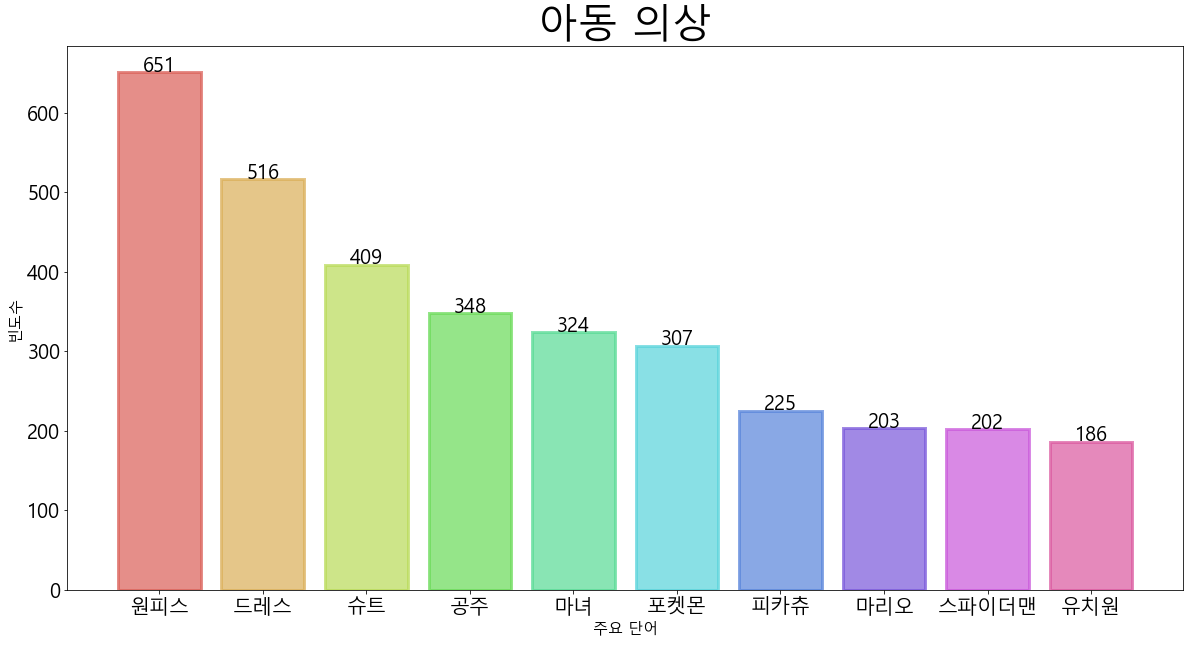

In [7]:
# han_tags 길이 출력
print(len(han_tags))

# 빈도 상위 10개 시각화
for i in han_tags[:15]:
    print(i[0],':', i[1])

word_list = list(dict(han_tags).keys())[:10]
num_list = list(dict(han_tags).values())[:10]

tick_size = 20 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot() ## Axes 추가
colors = sns.color_palette('hls',len(word_list)) ## 색상 지정

xtick_label_position = list(range(len(word_list))) ## x축 눈금 라벨이 표시될 x좌표

plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, word_list, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, num_list,
               color=colors, edgecolor=colors, alpha=0.7, linewidth=3) ## 바차트 출력

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.5,
            num_list[i],ha='center',fontsize=20)

plt.title('아동 의상',fontsize=40) ## 타이틀 출력
plt.xlabel('주요 단어',fontsize=axis_label_size)
plt.ylabel('빈도수',fontsize=axis_label_size)
plt.show()

(-0.5, 299.5, 299.5, -0.5)

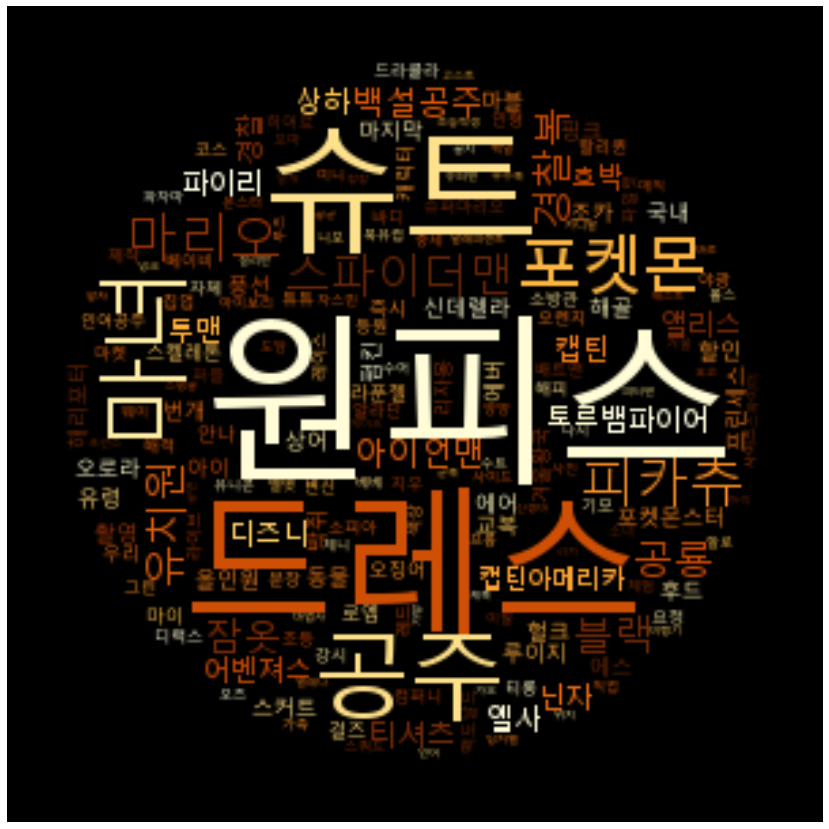

In [8]:
# 워드 클라우드

x, y = np.ogrid[:300, :300]
mask = (x-150) ** 2 + (y-150) ** 2 > 130 ** 2
mask = 255 *mask.astype(int)

wc = WordCloud(font_path = 'C:\\Windows\\Fonts\\malgun.ttf',
               background_color = 'black', mask = mask, colormap="YlOrBr").generate_from_frequencies(dict(han_tags))

plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')


In [9]:
# ## sentence 넣으면 stemmed 안 된 데이터
# ## stemmed_sentence 넣으면 stemmed 된 데이터

# bigram_sentence=train_costume_child['Noun'].apply(lambda x:ngrams(x,2))

# bigram_freq = {}
# for i in range(0,len(bigram_sentence)):
#     list_big=list(bigram_sentence[i])
#     for j in range(0,len(list_big)):
#         bigram_val=list_big[j]
#         if bigram_val not in bigram_freq:
#             bigram_freq[bigram_val]=1
#         bigram_freq[bigram_val] +=1

# sorted_bigram=sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

# keyword=[]
# for i in range(0,len(sorted_bigram)):
#     key=sorted_bigram[i][0]
#     if (len(key[0]) > 1 and len(key[1]) > 1):
#         keyword.append(key)
        
# keyword_df=pd.DataFrame(keyword,columns=['first','second'])
# keyword_df['keyword']=keyword_df['first']+' '+keyword_df['second']




# freq=[]
# for i in range(0,len(sorted_bigram)):
#     val=sorted_bigram[i][1]
#     key=sorted_bigram[i][0]
#     if (len(key[0]) > 1 and len(key[1]) > 1):
#         freq.append(val)

# freq_df=pd.DataFrame(freq,columns=['frequency'])


# big_final=pd.concat([keyword_df['keyword'],freq_df],axis=1)
# big_final[:100]

# 성인의상

1748
원피스 : 284
드레스 : 198
마녀 : 114
잠옷 : 108
해리포터 : 93
슈트 : 93
티셔츠 : 90
경찰 : 90
오징어 : 83
유령 : 81
에버 : 77
제복 : 72
블랙 : 66
상하 : 65
캐릭터 : 63


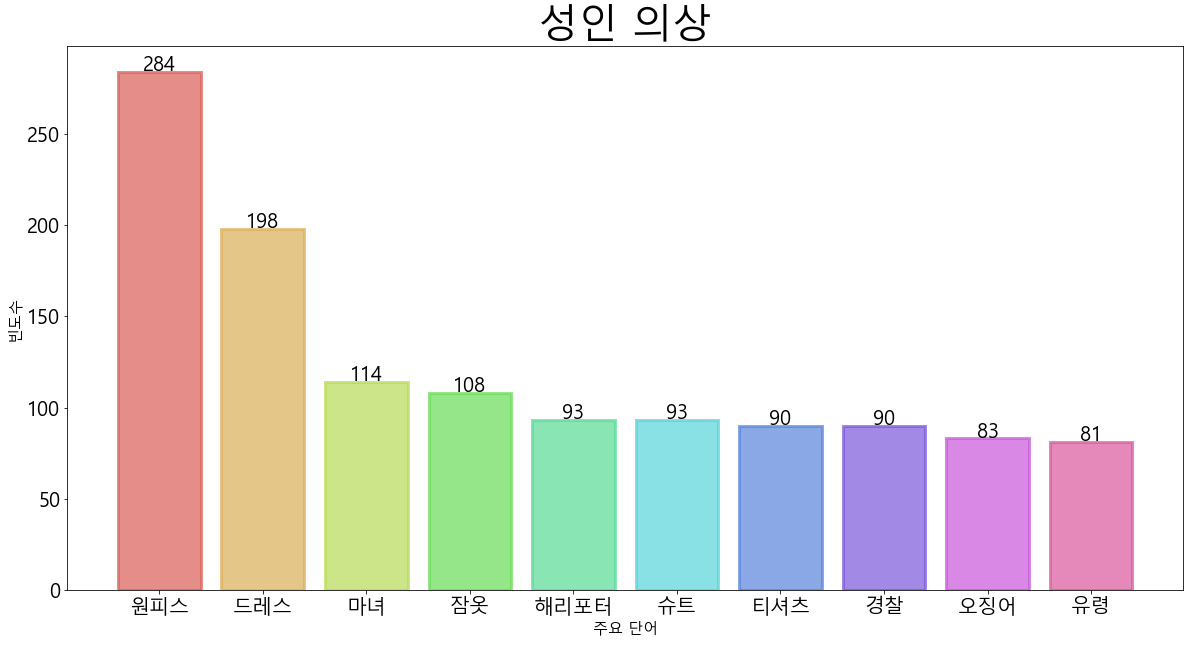

In [46]:
noun_text = [j for i in train_costume_adult['Noun'] for j in i]
text = nltk.Text(noun_text, name='NMSC')
count = Counter(text.vocab())
han_tags = Counter.most_common(count)

# 단어 길이가 1인 단어는 제외
wordInfo = dict()
for tags, counts in han_tags:
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts

han_tags = Counter.most_common(wordInfo)

# han_tags 길이 출력
print(len(han_tags))

# 빈도 상위 10개 시각화
for i in han_tags[:15]:
    print(i[0],':', i[1])

word_list = list(dict(han_tags).keys())[:10]
num_list = list(dict(han_tags).values())[:10]

tick_size = 20 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot() ## Axes 추가
colors = sns.color_palette('hls',len(word_list)) ## 색상 지정

xtick_label_position = list(range(len(word_list))) ## x축 눈금 라벨이 표시될 x좌표

plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, word_list, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, num_list,
               color=colors, edgecolor=colors, alpha=0.7, linewidth=3) ## 바차트 출력

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.5,
            num_list[i],ha='center',fontsize=20)

plt.title('성인 의상',fontsize=40) ## 타이틀 출력
plt.xlabel('주요 단어',fontsize=axis_label_size)
plt.ylabel('빈도수',fontsize=axis_label_size)
plt.show()

''

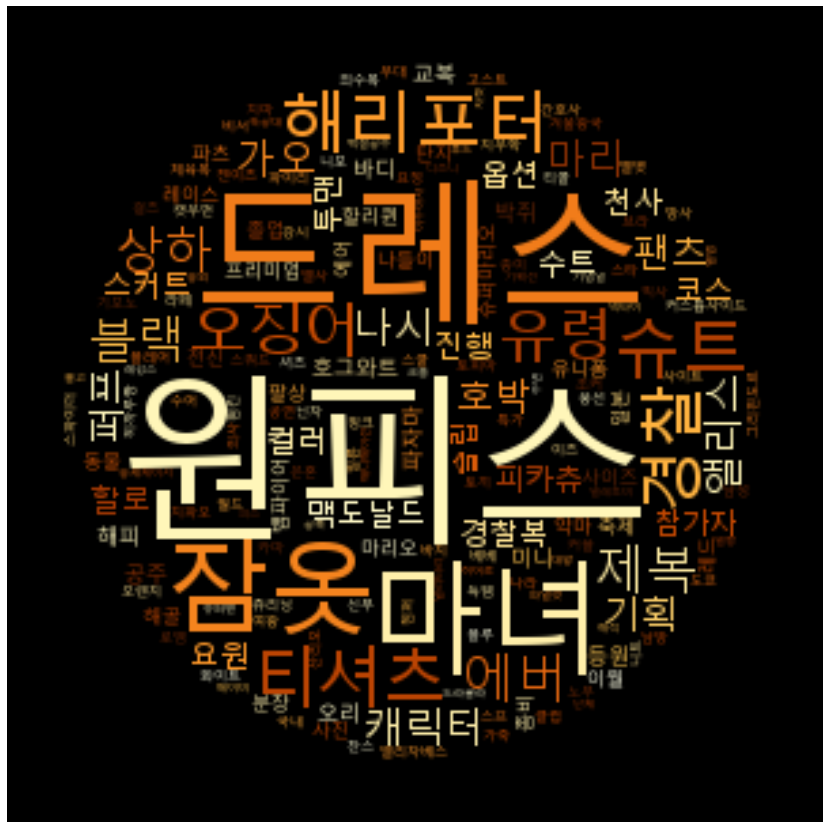

In [47]:
# 워드 클라우드

x, y = np.ogrid[:300, :300]
mask = (x-150) ** 2 + (y-150) ** 2 > 130 ** 2
mask = 255 *mask.astype(int)

wc = WordCloud(font_path = 'C:\\Windows\\Fonts\\malgun.ttf',
               background_color = 'black', mask = mask, colormap="YlOrBr").generate_from_frequencies(dict(han_tags))

plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
''

In [12]:
# ## sentence 넣으면 stemmed 안 된 데이터
# ## stemmed_sentence 넣으면 stemmed 된 데이터

# bigram_sentence=train_costume_adult['Noun'].apply(lambda x:ngrams(x,2))

# bigram_freq = {}
# for i in range(0,len(bigram_sentence)):
#     list_big=list(bigram_sentence[i])
#     for j in range(0,len(list_big)):
#         bigram_val=list_big[j]
#         if bigram_val not in bigram_freq:
#             bigram_freq[bigram_val]=1
#         bigram_freq[bigram_val] +=1

# sorted_bigram=sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

# keyword=[]
# for i in range(0,len(sorted_bigram)):
#     key=sorted_bigram[i][0]
#     if (len(key[0]) > 1 and len(key[1]) > 1):
#         keyword.append(key)
        
# keyword_df=pd.DataFrame(keyword,columns=['first','second'])
# keyword_df['keyword']=keyword_df['first']+' '+keyword_df['second']




# freq=[]
# for i in range(0,len(sorted_bigram)):
#     val=sorted_bigram[i][1]
#     key=sorted_bigram[i][0]
#     if (len(key[0]) > 1 and len(key[1]) > 1):
#         freq.append(val)

# freq_df=pd.DataFrame(freq,columns=['frequency'])


# big_final=pd.concat([keyword_df['keyword'],freq_df],axis=1)
# big_final[:100]

# 이벤트소품

1679
스티커 : 991
호박 : 850
장식 : 784
풍선 : 618
만들기 : 605
유령 : 443
바구니 : 392
데코 : 362
유치원 : 327
사탕 : 321
타투 : 277
포장 : 202
분장 : 149
키트 : 144
해골 : 143


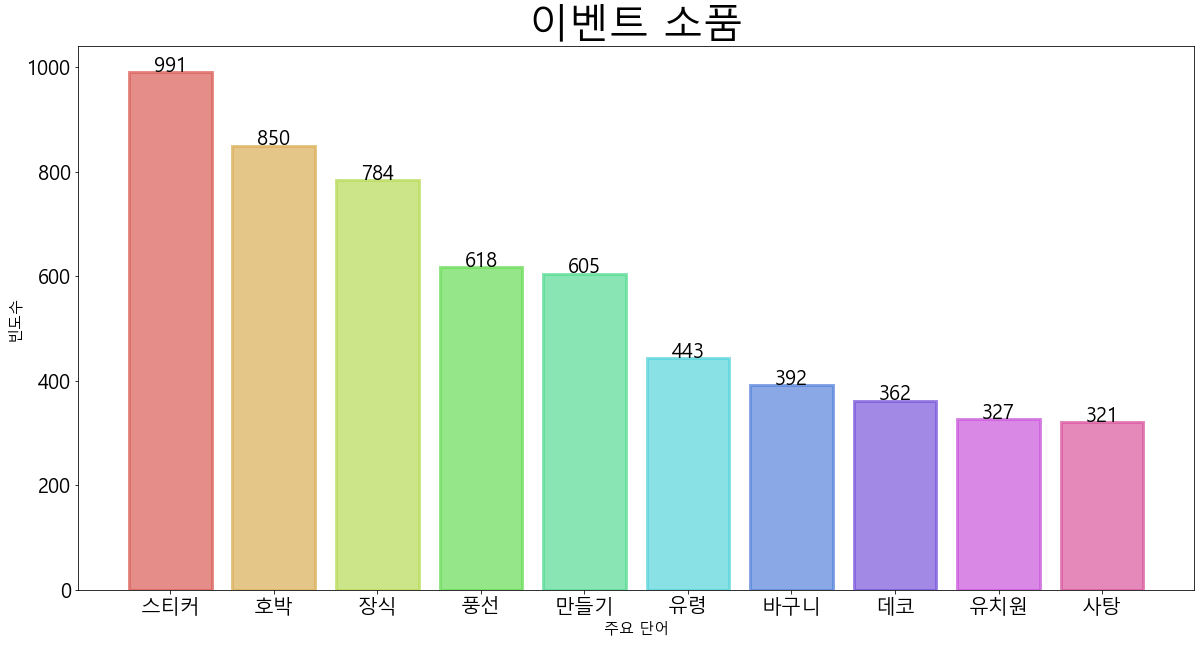

In [13]:
noun_text = [j for i in train_items_event['Noun'] for j in i]
text = nltk.Text(noun_text, name='NMSC')
count = Counter(text.vocab())
han_tags = Counter.most_common(count)

# 단어 길이가 1인 단어는 제외
wordInfo = dict()
for tags, counts in han_tags:
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts

han_tags = Counter.most_common(wordInfo)

# han_tags 길이 출력
print(len(han_tags))

# 빈도 상위 10개 시각화
for i in han_tags[:15]:
    print(i[0],':', i[1])

word_list = list(dict(han_tags).keys())[:10]
num_list = list(dict(han_tags).values())[:10]

tick_size = 20 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot() ## Axes 추가
colors = sns.color_palette('hls',len(word_list)) ## 색상 지정

xtick_label_position = list(range(len(word_list))) ## x축 눈금 라벨이 표시될 x좌표

plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, word_list, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, num_list,
               color=colors, edgecolor=colors, alpha=0.7, linewidth=3) ## 바차트 출력

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.5,
            num_list[i],ha='center',fontsize=20)

plt.title('이벤트 소품',fontsize=40) ## 타이틀 출력
plt.xlabel('주요 단어',fontsize=axis_label_size)
plt.ylabel('빈도수',fontsize=axis_label_size)
plt.show()

(-0.5, 299.5, 299.5, -0.5)

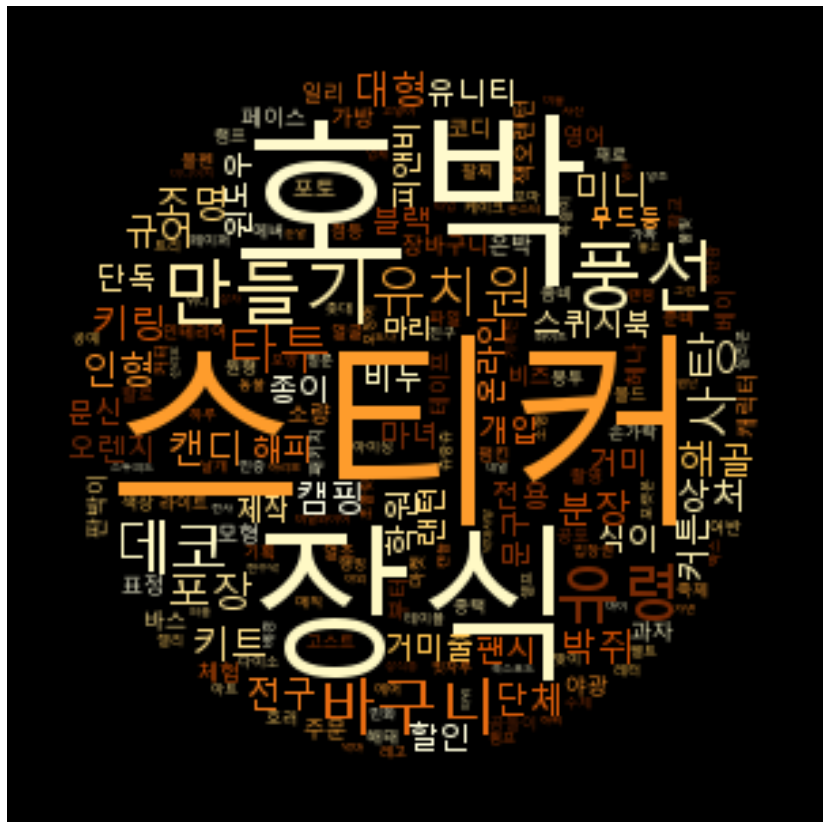

In [14]:
# 워드 클라우드

x, y = np.ogrid[:300, :300]
mask = (x-150) ** 2 + (y-150) ** 2 > 130 ** 2
mask = 255 *mask.astype(int)

wc = WordCloud(font_path = 'C:\\Windows\\Fonts\\malgun.ttf',
               background_color = 'black', mask = mask, colormap="YlOrBr").generate_from_frequencies(dict(han_tags))

plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

In [15]:
# ## sentence 넣으면 stemmed 안 된 데이터
# ## stemmed_sentence 넣으면 stemmed 된 데이터

# bigram_sentence=train_items_event['Noun'].apply(lambda x:ngrams(x,2))

# bigram_freq = {}
# for i in range(0,len(bigram_sentence)):
#     list_big=list(bigram_sentence[i])
#     for j in range(0,len(list_big)):
#         bigram_val=list_big[j]
#         if bigram_val not in bigram_freq:
#             bigram_freq[bigram_val]=1
#         bigram_freq[bigram_val] +=1

# sorted_bigram=sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

# keyword=[]
# for i in range(0,len(sorted_bigram)):
#     key=sorted_bigram[i][0]
#     if (len(key[0]) > 1 and len(key[1]) > 1):
#         keyword.append(key)
        
# keyword_df=pd.DataFrame(keyword,columns=['first','second'])
# keyword_df['keyword']=keyword_df['first']+' '+keyword_df['second']




# freq=[]
# for i in range(0,len(sorted_bigram)):
#     val=sorted_bigram[i][1]
#     key=sorted_bigram[i][0]
#     if (len(key[0]) > 1 and len(key[1]) > 1):
#         freq.append(val)

# freq_df=pd.DataFrame(freq,columns=['frequency'])


# big_final=pd.concat([keyword_df['keyword'],freq_df],axis=1)
# big_final[:100]

# 코스튬소품

1527
망토 : 1087
모자 : 568
마스크 : 514
머리띠 : 489
가면 : 438
호박 : 320
마녀 : 268
반지 : 251
드레스 : 158
원피스 : 157
해리포터 : 156
양말 : 154
스티커 : 151
밴드 : 150
이로 : 144


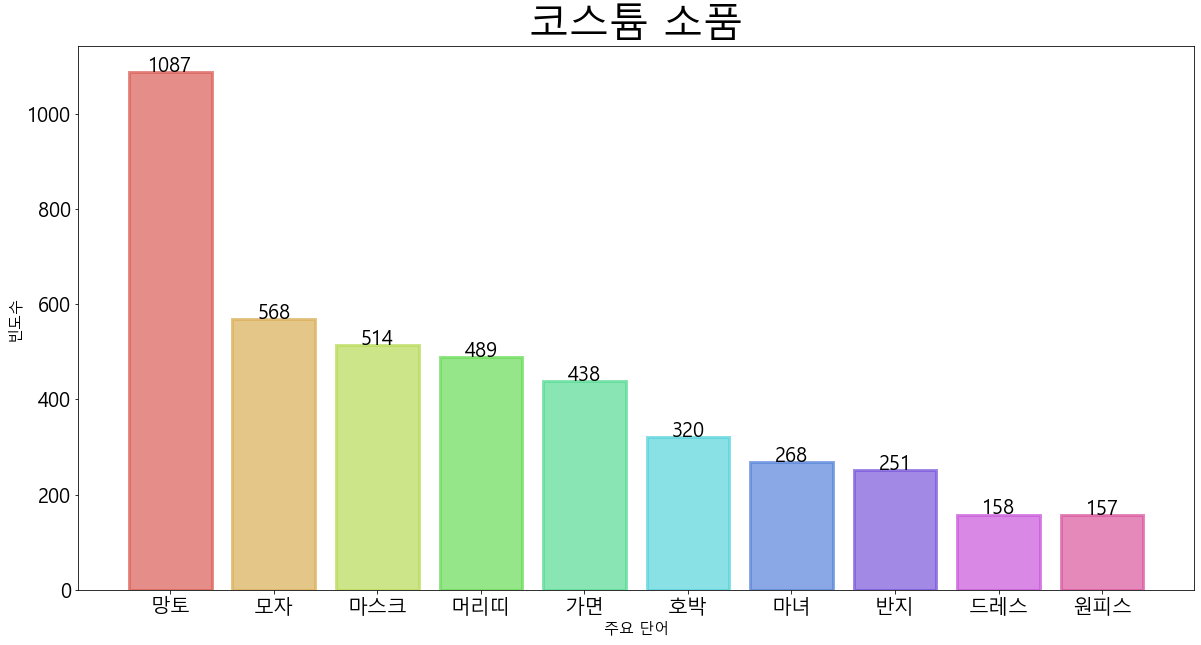

In [16]:
noun_text = [j for i in train_items_cos['Noun'] for j in i]
text = nltk.Text(noun_text, name='NMSC')
count = Counter(text.vocab())
han_tags = Counter.most_common(count)

# 단어 길이가 1인 단어는 제외
wordInfo = dict()
for tags, counts in han_tags:
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts

han_tags = Counter.most_common(wordInfo)

# han_tags 길이 출력
print(len(han_tags))

# 빈도 상위 10개 시각화
for i in han_tags[:15]:
    print(i[0],':', i[1])

word_list = list(dict(han_tags).keys())[:10]
num_list = list(dict(han_tags).values())[:10]

tick_size = 20 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot() ## Axes 추가
colors = sns.color_palette('hls',len(word_list)) ## 색상 지정

xtick_label_position = list(range(len(word_list))) ## x축 눈금 라벨이 표시될 x좌표

plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, word_list, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, num_list,
               color=colors, edgecolor=colors, alpha=0.7, linewidth=3) ## 바차트 출력

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.5,
            num_list[i],ha='center',fontsize=20)

plt.title('코스튬 소품',fontsize=40) ## 타이틀 출력
plt.xlabel('주요 단어',fontsize=axis_label_size)
plt.ylabel('빈도수',fontsize=axis_label_size)
plt.show()

(-0.5, 299.5, 299.5, -0.5)

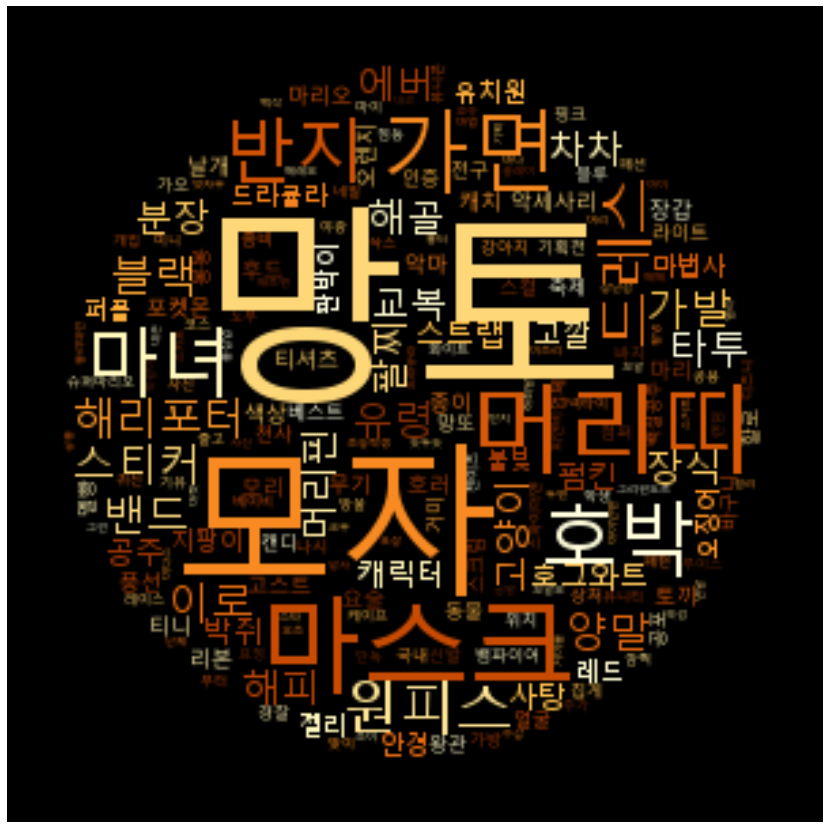

In [17]:
# 워드 클라우드

x, y = np.ogrid[:300, :300]
mask = (x-150) ** 2 + (y-150) ** 2 > 130 ** 2
mask = 255 *mask.astype(int)

wc = WordCloud(font_path = 'C:\\Windows\\Fonts\\malgun.ttf',
               background_color = 'black', mask = mask, colormap="YlOrBr").generate_from_frequencies(dict(han_tags))

plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

In [18]:
# ## sentence 넣으면 stemmed 안 된 데이터
# ## stemmed_sentence 넣으면 stemmed 된 데이터

# bigram_sentence=train_items_cos['Noun'].apply(lambda x:ngrams(x,2))

# bigram_freq = {}
# for i in range(0,len(bigram_sentence)):
#     list_big=list(bigram_sentence[i])
#     for j in range(0,len(list_big)):
#         bigram_val=list_big[j]
#         if bigram_val not in bigram_freq:
#             bigram_freq[bigram_val]=1
#         bigram_freq[bigram_val] +=1

# sorted_bigram=sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

# keyword=[]
# for i in range(0,len(sorted_bigram)):
#     key=sorted_bigram[i][0]
#     if (len(key[0]) > 1 and len(key[1]) > 1):
#         keyword.append(key)
        
# keyword_df=pd.DataFrame(keyword,columns=['first','second'])
# keyword_df['keyword']=keyword_df['first']+' '+keyword_df['second']




# freq=[]
# for i in range(0,len(sorted_bigram)):
#     val=sorted_bigram[i][1]
#     key=sorted_bigram[i][0]
#     if (len(key[0]) > 1 and len(key[1]) > 1):
#         freq.append(val)

# freq_df=pd.DataFrame(freq,columns=['frequency'])


# big_final=pd.concat([keyword_df['keyword'],freq_df],axis=1)
# big_final[:100]